In [2]:
import pickle
import numpy as np
import matplotlib
import matplotlib.path as mplPath
import matplotlib.pyplot as plt
import os
import math
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors


name =  '2025_02_06_15_05_110SAC' # '2025_01_22_22_53_000SAC'   '2024_11_04_16_24_37' #'2024_06_11_15_11_25' 
env_name = 'myoTorsoReachFixed-v1'
steps = 700
cut = 100

pkl_path = './output/PKL/' + env_name + '/'
ep = 100


def load_pickle(file_path):
    with open(file_path, 'rb') as file:
        return pickle.load(file)

image_path = './image/' + env_name + '/' + name
os.makedirs(image_path, exist_ok=True)

bins = [0, 2, 4, 6, 8, 10]
bins_high = [20, 22, 24, 26, 28, 30]
stand, stand_80, stand_60 = [], [], []

In [3]:
AP_pert = []
pert_1_AP, pert_2_AP, pert_3_AP, pert_4_AP, pert_5_AP = [], [], [], [], []
pert_1_AP_high, pert_2_AP_high, pert_3_AP_high, pert_4_AP_high, pert_5_AP_high = [], [], [], [], []
for i in range(ep):
    file_path = pkl_path + name+f'_{i}.pkl'  # Replace with actual file paths
    data = load_pickle(file_path)
    height = data['bodyInfo']['height']
    if height[-1] > 0.5:
        filtered_data = {
            'modelInfo': data['modelInfo'],
            'jointInfo':data['jointInfo'],
        }
        stand.append(filtered_data)

print(len(stand))

100


In [4]:
name = '2025_02_10_13_44_020SAC'#'2024_11_04_16_24_37' #'2024_06_11_15_11_25' 
env_name = 'myoSarcTorsoReachFixed-v1'

pkl_path = './output/PKL/' + env_name + '/'
for i in range(ep):
    file_path = pkl_path + name+f'_{i}.pkl'  # Replace with actual file paths
    data = load_pickle(file_path)
    height = data['bodyInfo']['height']
    if height[-1] > 0.5:
        filtered_data = {
            'modelInfo': data['modelInfo'],
            'jointInfo':data['jointInfo'],
        }
        stand_80.append(filtered_data)

In [5]:
name = '2025_02_12_14_12_560SAC'#'2025_02_11_09_54_530SAC'#'2024_11_04_16_24_37' #'2024_06_11_15_11_25' 
env_name = 'myoSarcTorsoReachFixed-v1'

pkl_path = './output/PKL/' + env_name + '/'
for i in range(ep):
    file_path = pkl_path + name+f'_{i}.pkl'  # Replace with actual file paths
    data = load_pickle(file_path)
    height = data['bodyInfo']['height']
    if height[-1] > 0.5:
        filtered_data = {
            'modelInfo': data['modelInfo'],
            'jointInfo':data['jointInfo'],
        }
        stand_60.append(filtered_data)

In [6]:
stand_40 = []
name = '2025_02_12_00_04_090SAC'#'2024_11_04_16_24_37' #'2024_06_11_15_11_25' 
env_name = 'myoSarcTorsoReachFixed-v1'

pkl_path = './output/PKL/' + env_name + '/'
for i in range(ep):
    file_path = pkl_path + name+f'_{i}.pkl'  # Replace with actual file paths
    data = load_pickle(file_path)
    height = data['bodyInfo']['height']
    if height[-1] > 0.5:
        filtered_data = {
            'modelInfo': data['modelInfo'],
            'jointInfo':data['jointInfo'],
        }
        stand_40.append(filtered_data)

In [7]:
print(len(stand_80), len(stand_60))

100 100


In [8]:
def joint_value(stand_dict):
    time_len = 200
    ankle_range = []
    hip_range = []
    pert = []
    for data in stand_dict:
        p_t = int(data['modelInfo']['perturbationTime']*100)
        pert.append(max(abs(arr[0]) for arr in data['jointInfo']['qacc']['slide_joint'][p_t: p_t+20]))
        ankle_left = max(data['jointInfo']['qpos']['ankle_angle_l'][p_t:p_t+time_len])*180/np.pi - min(data['jointInfo']['qpos']['ankle_angle_l'][p_t:p_t+time_len])*180/np.pi
        ankle_right = max(data['jointInfo']['qpos']['ankle_angle_r'][p_t:p_t+time_len])*180/np.pi - min(data['jointInfo']['qpos']['ankle_angle_r'][p_t:p_t+time_len])*180/np.pi
        ankle_range.append(np.mean([ankle_left, ankle_right]))
        hip_left = max(data['jointInfo']['qpos']['hip_flexion_l'][p_t:p_t+time_len])*180/np.pi - min(data['jointInfo']['qpos']['hip_flexion_l'][p_t:p_t+time_len])*180/np.pi
        hip_right = max(data['jointInfo']['qpos']['hip_flexion_r'][p_t:p_t+time_len])*180/np.pi - min(data['jointInfo']['qpos']['hip_flexion_r'][p_t:p_t+time_len])*180/np.pi
        hip_range.append(np.mean([hip_left, hip_right]))
    return hip_range, ankle_range, pert

In [9]:
from numpy.polynomial.polynomial import polyfit

In [10]:
hip_range_healthy, ankle_range_healthy, pert_healthy = joint_value(stand)
b_healthy_a, m_healthy_a = polyfit(pert_healthy, ankle_range_healthy, 1)
b_healthy_h, m_healthy_h = polyfit(pert_healthy, hip_range_healthy, 1)

hip_range_80, ankle_range_80, pert_80 = joint_value(stand_80)
b_80_a, m_80_a = polyfit(pert_80, ankle_range_80, 1)
b_80_h, m_80_h = polyfit(pert_80, hip_range_80, 1)

hip_range_60, ankle_range_60, pert_60 = joint_value(stand_60)
b_60_a, m_60_a = polyfit(pert_60, ankle_range_60, 1)
b_60_h, m_60_h = polyfit(pert_60, hip_range_60, 1)

hip_range_40, ankle_range_40, pert_40 = joint_value(stand_40)
b_40_a, m_40_a = polyfit(pert_40, ankle_range_40, 1)
b_40_h, m_40_h = polyfit(pert_40, hip_range_40, 1)

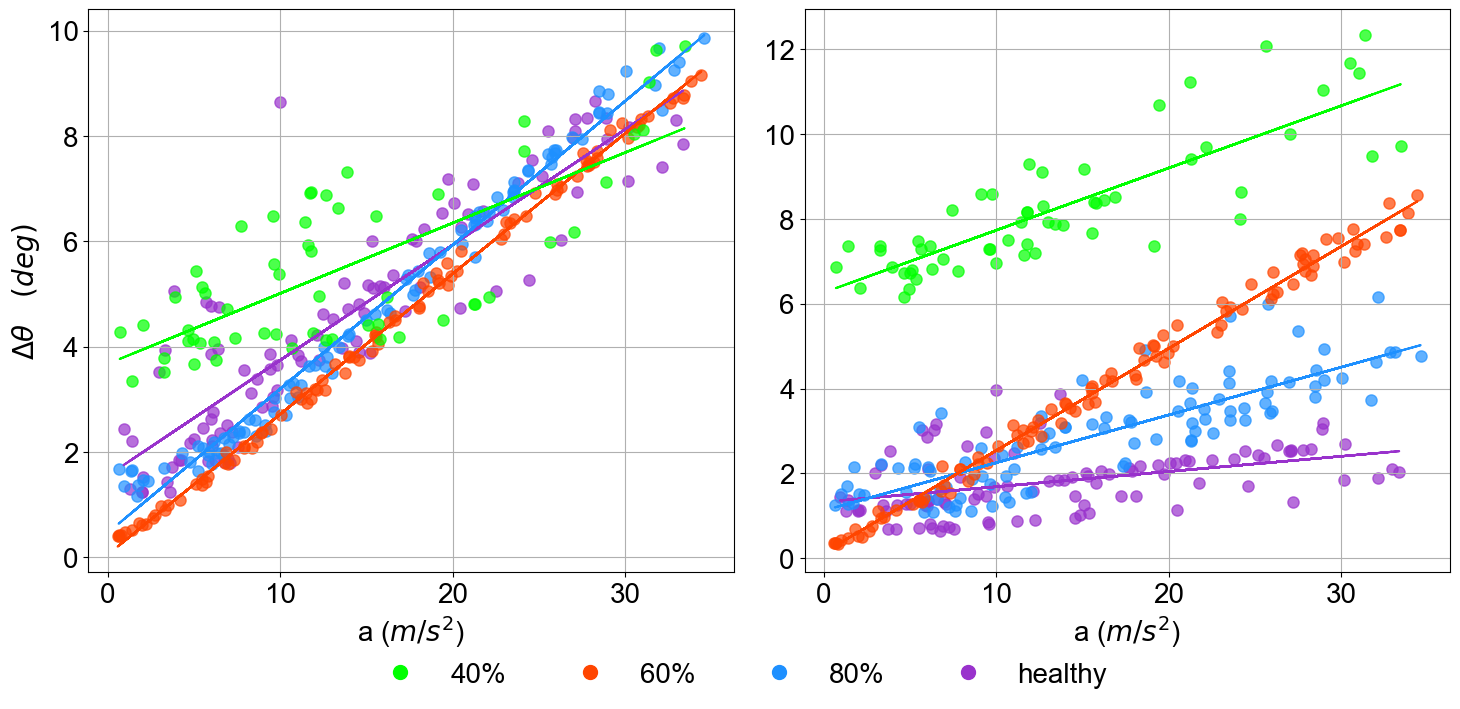

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
plt.rcParams.update({
    "font.family": "Arial",  # specify font family here
    "font.size":20}) 

# First scatter plot
ax1.scatter(pert_healthy, ankle_range_healthy, s = 65, color='darkorchid', label = 'healthy', alpha=0.7)
ax1.plot(pert_healthy, b_healthy_a + m_healthy_a * np.array(pert_healthy), color = 'darkorchid')
ax1.scatter(pert_80, ankle_range_80, s = 65, color='dodgerblue', label = '80', alpha=0.7)
ax1.plot(pert_80, b_80_a + m_80_a * np.array(pert_80), color = 'dodgerblue')
ax1.scatter(pert_60, ankle_range_60,  s = 65,color='orangered', label = '60', alpha=0.7)
ax1.plot(pert_60, b_60_a + m_60_a * np.array(pert_60), color = 'orangered')
ax1.scatter(pert_40, ankle_range_40,  s = 65,color='lime', label = '40', alpha=0.7)
ax1.plot(pert_40, b_40_a + m_40_a * np.array(pert_40), color = 'lime') 
#ax1.set_title('Maximum Ankle Range', pad=20)
ax1.set_xlabel(r'a ($m/s^2$)')
ax1.set_ylabel(r'$\Delta \theta \quad (deg)$')
ax1.grid(True)
#ax1.legend(loc = 'lower right', fontsize = 'small')

# Second scatter plot
ax2.scatter(pert_healthy, hip_range_healthy, s = 65, color='darkorchid', label = 'healthy', alpha=0.7)
ax2.plot(pert_healthy, b_healthy_h + m_healthy_h * np.array(pert_healthy), color = 'darkorchid')
ax2.scatter(pert_80, hip_range_80,  s = 65,color='dodgerblue', label = '80', alpha=0.7)
ax2.plot(pert_80, b_80_h + m_80_h * np.array(pert_80), color = 'dodgerblue')
ax2.scatter(pert_60, hip_range_60,  s = 65,color='orangered', label = '60', alpha=0.7)
ax2.plot(pert_60, b_60_h + m_60_h * np.array(pert_60), color = 'orangered')
ax2.scatter(pert_40, hip_range_40, s = 65, color='lime', label = '40', alpha=0.7)
ax2.plot(pert_40, b_40_h + m_40_h * np.array(pert_40), color = 'lime')
#ax2.set_title('Maximum Hip Range', pad=20)
ax2.set_xlabel(r'a ($m/s^2$)')
ax2.grid(True)

# Adjust layout and display the plot
plt.tight_layout()
plt.legend(labels=[  '40%',  '60%', '80%','healthy'], 
           loc='lower center', bbox_to_anchor=(-0.1, -0.25), ncol=4, frameon=False,
           handles=[
               plt.Line2D([0], [0], marker='o', color='lime', markersize=10, lw = 0),
               plt.Line2D([0], [0], marker='o', color='orangered', markersize=10,  lw = 0),
               plt.Line2D([0], [0], marker='o', color='dodgerblue', markersize=10, lw = 0),
               plt.Line2D([0], [0], marker='o', color='darkorchid', markersize=10, lw = 0)
           ])
plt.show()


In [12]:
def torque_value(stand_dict):
    time_len = 200
    ankle_range = []
    hip_range = []
    pert = []
    for data in stand_dict:
        p_t = int(data['modelInfo']['perturbationTime']*100)
        pert.append(max(abs(arr[0]) for arr in data['jointInfo']['qacc']['slide_joint'][p_t: p_t+20]))
        ankle_left = max(data['jointInfo']['qtau']['ankle_angle_l'][p_t:p_t+time_len]) - min(data['jointInfo']['qtau']['ankle_angle_l'][p_t:p_t+time_len])
        ankle_right = max(data['jointInfo']['qtau']['ankle_angle_r'][p_t:p_t+time_len]) - min(data['jointInfo']['qtau']['ankle_angle_r'][p_t:p_t+time_len])
        ankle_range.append(np.mean([ankle_left, ankle_right]))
        hip_left = max(data['jointInfo']['qtau']['hip_flexion_l'][p_t:p_t+time_len]) - min(data['jointInfo']['qtau']['hip_flexion_l'][p_t:p_t+time_len])
        hip_right = max(data['jointInfo']['qtau']['hip_flexion_r'][p_t:p_t+time_len]) - min(data['jointInfo']['qtau']['hip_flexion_r'][p_t:p_t+time_len])
        hip_range.append(np.mean([hip_left, hip_right]))
    return hip_range, ankle_range, pert

In [13]:
hip_torque_healthy, ankle_torque_healthy, pert_healthy = torque_value(stand)
hip_torque_80, ankle_torque_80, pert_80 = torque_value(stand_80)
hip_torque_60, ankle_torque_60, pert_60 = torque_value(stand_60)
hip_torque_40, ankle_torque_40, pert_40 = torque_value(stand_40)

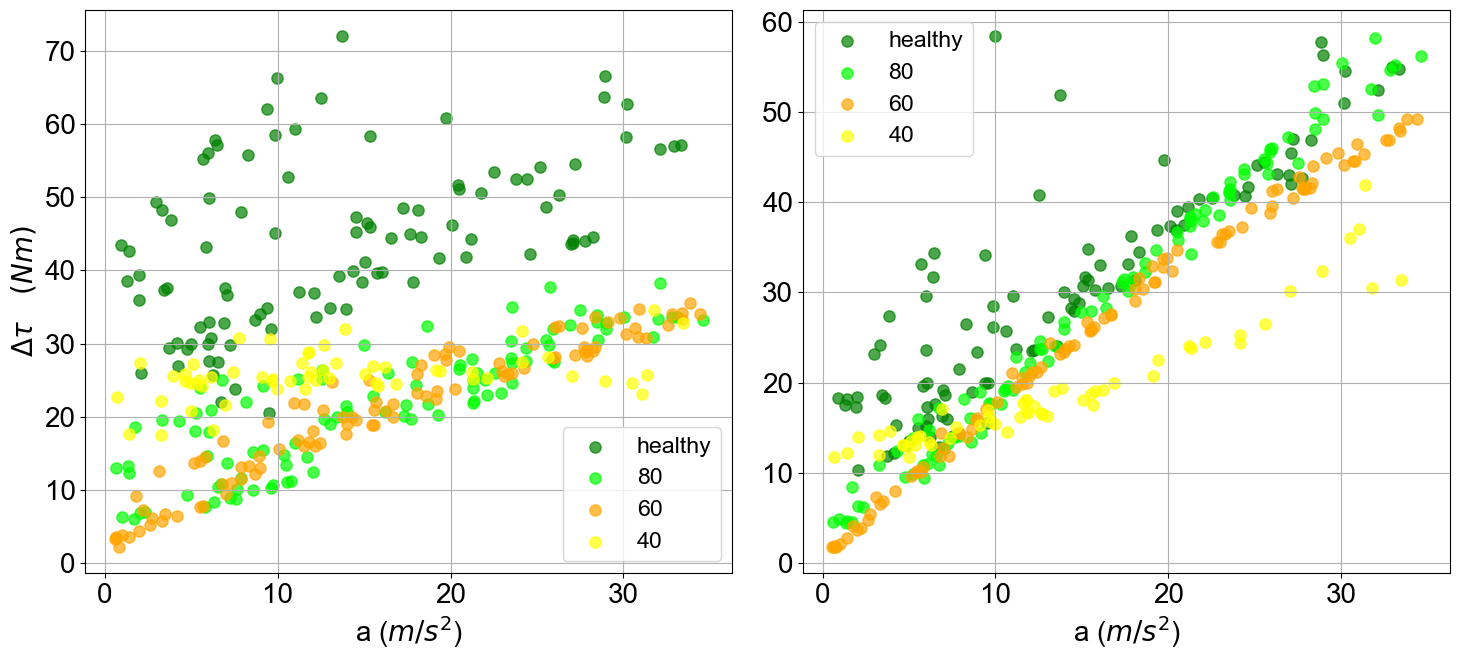

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
plt.rcParams.update({
    "font.family": "Arial",  # specify font family here
    "font.size":20}) 

# First scatter plot
ax1.scatter(pert_healthy, ankle_torque_healthy, s = 65,color='green', label = 'healthy', alpha=0.7)
ax1.scatter(pert_80, ankle_torque_80, s = 65,color='lime', label = '80', alpha=0.7)
ax1.scatter(pert_60, ankle_torque_60, s = 65,color='orange', label = '60', alpha=0.7)
ax1.scatter(pert_40, ankle_torque_40, s = 65,color='yellow', label = '40', alpha=0.7)
#ax1.set_title('Ankle Torque Range', pad=20)
ax1.set_xlabel(r'a ($m/s^2$)')
ax1.set_ylabel(r'$\Delta \tau \quad (Nm)$')
ax1.grid(True)
ax1.legend(fontsize = 'small')

# Second scatter plot
ax2.scatter(pert_healthy, hip_torque_healthy, s = 65,color='green', label = 'healthy', alpha=0.7)
ax2.scatter(pert_80, hip_torque_80,s = 65, color='lime', label = '80', alpha=0.7)
ax2.scatter(pert_60, hip_torque_60, s = 65,color='orange', label = '60', alpha=0.7)
ax2.scatter(pert_40, hip_torque_40,  s = 65,color='yellow', label = '40', alpha=0.7)
#ax2.set_title('Hip Torque Range', pad=20)
ax2.set_xlabel(r'a ($m/s^2$)')
ax2.grid(True)

# Adjust layout and display the plot
plt.tight_layout()
plt.legend(fontsize = 'small')
plt.show()


In [15]:
def metabolic(stand_list):
    metabolic_all = []
    for data in stand_list:
        metabolic = []
        for i in range(700):
            metabolic.append(-data['modelInfo']['rewardDict'][i]['metabolicCost']) 
        metabolic_all.append(np.mean(metabolic))
    
    return metabolic_all

In [16]:
meta_healthy = metabolic(stand)
print(meta_healthy)
meta_80 = metabolic(stand_80)
meta_60 = metabolic(stand_60)
meta_40 = metabolic(stand_40)

[0.42784943282128746, 0.42805239441524845, 0.4284866425088094, 0.42772664545260314, 0.42959046562896835, 0.4278815670987314, 0.4275008417271122, 0.427749310621066, 0.42884256095027135, 0.4284613480092933, 0.42777018753077756, 0.4274702994046889, 0.4309251937246688, 0.42875842238364903, 0.42856227716414586, 0.4279094734524019, 0.4277332385577586, 0.42966380702220736, 0.4262945598457463, 0.427757522941693, 0.42622654292766454, 0.4277849716992294, 0.42779607156144445, 0.4277570004729575, 0.4373696650939216, 0.4277863640968285, 0.42937507646650075, 0.4287159642784271, 0.42773896847289045, 0.4279018677942869, 0.4277885749713717, 0.42772837029551447, 0.4279262649854431, 0.4267205028441812, 0.43110865394502085, 0.4277475898681598, 0.42834466367184837, 0.4322324291153625, 0.42909166260318965, 0.4289470525518459, 0.4290354860393327, 0.4276316004866063, 0.42775668019696045, 0.43126211047339275, 0.42791086747205154, 0.42966506605150473, 0.4277598558192908, 0.4292707212649676, 0.4260308193129701, 

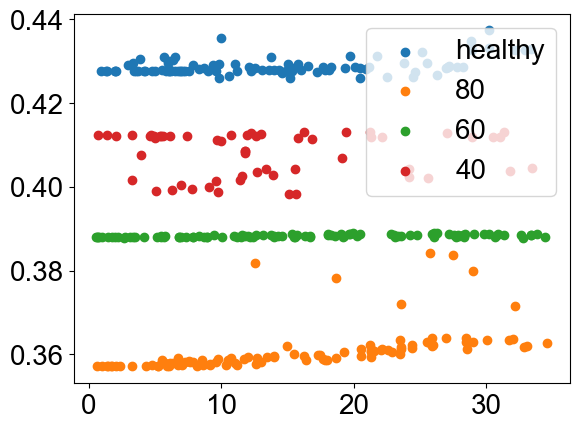

In [17]:
plt.scatter(pert_healthy, meta_healthy, label = 'healthy')
plt.scatter(pert_80, meta_80, label = '80')
plt.scatter(pert_60, meta_60, label = '60')
plt.scatter(pert_40, meta_40, label = '40')
plt.legend()
plt.show()